c:\Users\sanik\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\sanik\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


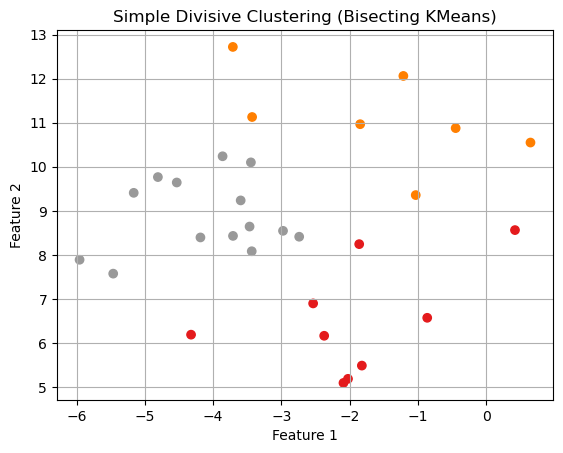

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Step 1: Generate sample data
X, _ = make_blobs(n_samples=30, centers=1, cluster_std=2.0, random_state=42)

# Step 2: Start with one big cluster (apply KMeans with 2 clusters)
kmeans1 = KMeans(n_clusters=2, random_state=42)
labels1 = kmeans1.fit_predict(X)

# Step 3: Split one of the clusters again
# Let's split cluster 0 further
X_cluster0 = X[labels1 == 0]

# Apply KMeans on cluster 0 again
kmeans2 = KMeans(n_clusters=2, random_state=42)
labels2 = kmeans2.fit_predict(X_cluster0)

# Final label assignment: rename clusters
final_labels = np.full(X.shape[0], -1)
final_labels[labels1 == 1] = 0      # original cluster 1 stays as 0
final_labels[labels1 == 0] = labels2 + 1  # split into 1 and 2

# Step 4: Plot the final result
plt.scatter(X[:, 0], X[:, 1], c=final_labels, cmap='Set1')
plt.title("Simple Divisive Clustering (Bisecting KMeans)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()


c:\Users\sanik\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\sanik\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


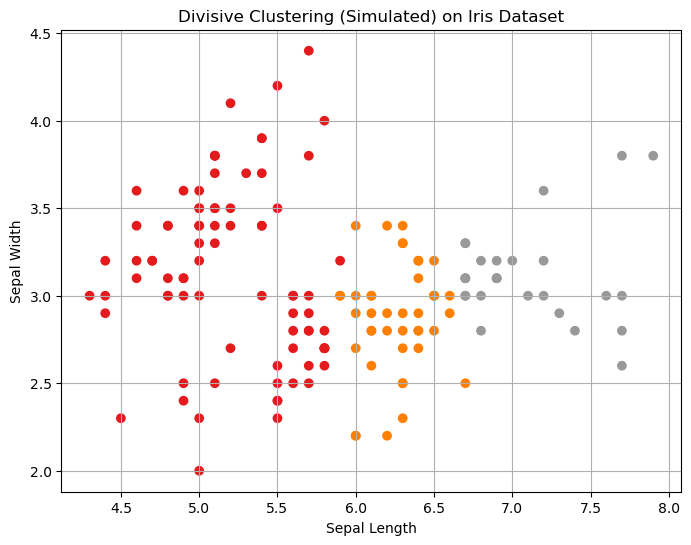

In [2]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

# Step 1: Load built-in Iris dataset (use only 2 features for easy plotting)
iris = load_iris()
X = iris.data[:, :2]  # Sepal length and Sepal width

# Step 2: First split – apply KMeans to entire data (2 clusters)
kmeans1 = KMeans(n_clusters=2, random_state=42)
labels1 = kmeans1.fit_predict(X)

# Step 3: Second split – further split one of the clusters
X_cluster0 = X[labels1 == 0]  # pick one cluster to divide
kmeans2 = KMeans(n_clusters=2, random_state=42)
labels2 = kmeans2.fit_predict(X_cluster0)

# Step 4: Merge labels to create 3 final clusters
final_labels = np.full(X.shape[0], -1)
final_labels[labels1 == 1] = 0               # Cluster 1 becomes cluster 0
final_labels[labels1 == 0] = labels2 + 1     # Cluster 0 is split into clusters 1 and 2

# Step 5: Plot results
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=final_labels, cmap='Set1')
plt.title("Divisive Clustering (Simulated) on Iris Dataset")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.grid(True)
plt.show()